# Aviation Accident Analysis: Identifying Low-Risk Aircraft Options

### 1. Introduction



Any company's venture into aviation has both exciting opportunities and possible risks. This project supports our company's venture into aviation and aircrafts, by analyzing aircraft models and identifying low risk ones; based on the vast amounts of data available. Coming with this data backed evidence, this project aims to drive confident and informed investment decisions in specifically purchasing low risk aircrafts; which may in turn inform other minor decisions in pilot training, maintenance strategies and much more actionable insights to the **Head of the Aviation Division** and all other stakeholders. This analysis is important not only to us as a company and protecting our investments; but also ensuring utmost safety for our pilots and customers.

### 2. Business Problem Statement




Our company with no prior experience in aviation and no knowledge in aircraft models, wants to leverage data analysist to bring insights and new information to inform the kind of aircrafts to invest in that are the lowest risk. Without this analysis the company risks losses in their investments, and worse yet losses of lives of customers and aircraft personnel. The Head of the Aviation Division will recieve actionable recommendations in this regard to make business decisions.

---

### 3. Objectives


 - Finding safe engine designs and what aircrafts they're on
 - Evaluating aircraft models for resilience in diverse weather conditions
 - Determining low risk flight purposes and aircraft models suited.

### 4. Data Understanding


We'll start by breaking down our dataset to understand the data leading our analysis.


#### 4.1 Dataset Information
Our dataset `(AviationData.csv)` is historical aviation accident records, spanning several decades, from 1923 to 2022; and covering varying incidents from the United States (93%) and conditions. It contains `88863` different accident numbers; with `31` columns of info related to each. It also contains rows with missing data which may be as a result of differnt aircrafts having different error reporting methods. We also have a seperate small dataset of US state codes which will be useful in our location based analysis `(UseState_Codes.csv)`


#### 4.2 Dataset Summary

Our fields of concern that directly address our objectives and ultimately our problem statement include but are not limited to:


| **Field**             | **Description**                                           | **Data Type**  | **Relevance**                                             |
|-----------------------|-----------------------------------------------------------|----------------|-----------------------------------------------------------|
| Event.Id              | Unique accident identifier                                | String         | Tracks individual accident records                        |
| Event.Date            | Date of incident                                          | Date           | Enables time based trend and seasonal analysis           |
| Aircraft.Model        | Aircraft model name                                       | String         | Allows comparison of safety records among models           |
| Aircraft.damage       | Degree of aircraft damage             | Categorical    | Indicator of accident severity                |
| Number.of.Engines     | Number of engines on the aircraft                         | Integer        | Impact of this on safety       |
| Engine.Type           | Type of engine (Reciprocating, Turbo Fan)           | String         | Assists in identifying safe engine designs                  |
| Weather.Condition     | Weather conditions during the incident                    | String         | Assists in identifying performance under adverse conditions        |
| Broad.phase.of.flight | Phase of flight (takeoff, cruise, landing)          | String         | Identifies high-risk flight phases                          |
| Injury.Severity       | Level of injuries sustained (Fatal, Non-Fatal)      | String         | Risk analysis based on accident outcomes       |

*Source: [Kaggle](https://www.kaggle.com/datasets/khsamaha/aviation-accident-database-synopses/data)*

### 5. Data Exploration

Initial exploration to better understand dataset structure

#### 5.1 Importing libraries and data

In [668]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#load data
df= pd.read_csv("./data/AviationData.csv", encoding='latin1')
states_df = pd.read_csv('./data/USState_Codes.csv', encoding='latin1')

C:\Users\Lewis\AppData\Local\Temp\ipykernel_16604\1704516843.py:8: DtypeWarning: Columns (6,7,28) have mixed types. Specify dtype option on import or set low_memory=False.
  df= pd.read_csv("./data/AviationData.csv", encoding='latin1')


#### 5.2 General overview of data

In [669]:
df.head()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
0,20001218X45444,Accident,SEA87LA080,1948-10-24,"MOOSE CREEK, ID",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,UNK,Cruise,Probable Cause,NaN
1,20001218X45447,Accident,LAX94LA336,1962-07-19,"BRIDGEPORT, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,4.0,0.0,0.0,0.0,UNK,Unknown,Probable Cause,19-09-1996
2,20061025X01555,Accident,NYC07LA005,1974-08-30,"Saltville, VA",United States,36.922223,-81.878056,NaN,NaN,...,Personal,NaN,3.0,NaN,NaN,NaN,IMC,Cruise,Probable Cause,26-02-2007
3,20001218X45448,Accident,LAX96LA321,1977-06-19,"EUREKA, CA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,2.0,0.0,0.0,0.0,IMC,Cruise,Probable Cause,12-09-2000
4,20041105X01764,Accident,CHI79FA064,1979-08-02,"Canton, OH",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,1.0,2.0,NaN,0.0,VMC,Approach,Probable Cause,16-04-1980


In [670]:
df.tail()

,Event.Id,Investigation.Type,Accident.Number,Event.Date,Location,Country,Latitude,Longitude,Airport.Code,Airport.Name,...,Purpose.of.flight,Air.carrier,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured,Weather.Condition,Broad.phase.of.flight,Report.Status,Publication.Date
88884,20221227106491,Accident,ERA23LA093,2022-12-26,"Annapolis, MD",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,0.0,NaN,NaN,NaN,29-12-2022
88885,20221227106494,Accident,ERA23LA095,2022-12-26,"Hampton, NH",United States,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88886,20221227106497,Accident,WPR23LA075,2022-12-26,"Payson, AZ",United States,341525N,1112021W,PAN,PAYSON,...,Personal,NaN,0.0,0.0,0.0,1.0,VMC,NaN,NaN,27-12-2022
88887,20221227106498,Accident,WPR23LA076,2022-12-26,"Morgan, UT",United States,NaN,NaN,NaN,NaN,...,Personal,MC CESSNA 210N LLC,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
88888,20221230106513,Accident,ERA23LA097,2022-12-29,"Athens, GA",United States,NaN,NaN,NaN,NaN,...,Personal,NaN,0.0,1.0,0.0,1.0,NaN,NaN,NaN,30-12-2022


Succcesfuly loaded our data set. And we can immediately see the 31 columns we have and alot of missing values

In [671]:
df.describe()

,Number.of.Engines,Total.Fatal.Injuries,Total.Serious.Injuries,Total.Minor.Injuries,Total.Uninjured
count,82805.000000,77488.000000,76379.000000,76956.000000,82977.000000
mean,1.146585,0.647855,0.279881,0.357061,5.325440
std,0.446510,5.485960,1.544084,2.235625,27.913634
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000
75%,1.000000,0.000000,0.000000,0.000000,2.000000
max,8.000000,349.000000,161.000000,380.000000,699.000000


- Fatal injuries statistics from `Total.Fatal.Injuries` reveals:
    - Mean of ~0.45 fatalities per incident
    - Maximum of 583 fatalities in a single incident
    - 75% of accidents had 0 fatalities (75th percentile is 0)

- Non fatal statistics from `Total.Serious.Injuries`, `Total.Minor.Injuries` reveal, and `Total.Uninjured`:
    - Average of ~0.14 serious injuries per incident
    - Mean of ~0.18 minor injuries
    - Mean of 1.64 uninjured persons tells us most accidents had survivors

- Aircrafts:
    - Most aircraft involved had 1-2 engines
    - Maximum number of engines in any incident was 8

This initial overview suggests that while aviation accidents are serious events, the majority result in no fatalities, with most people surviving the incidents. This aligns with general aviation safety sentiment on their safety

#### 5.2 Data shape, data types and missing data 

In [672]:
print(df.isnull().sum())

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [673]:
print(f"Aviation data shape: {df.shape}")
print(f"State codes data shape: {states_df.shape}")

Aviation data shape: (88889, 31)
State codes data shape: (62, 2)


- Our aviation dataset has a total of `88889 rows` and `31 columns`. 
- Our states dataset is much smaller `62 rows` and `2 columns` will serve as a reference table for mapping state abbreviations to full names.

In [674]:
#check for data types and null values
df.isnull().sum()

Event.Id                      0
Investigation.Type            0
Accident.Number               0
Event.Date                    0
Location                     52
Country                     226
Latitude                  54507
Longitude                 54516
Airport.Code              38757
Airport.Name              36185
Injury.Severity            1000
Aircraft.damage            3194
Aircraft.Category         56602
Registration.Number        1382
Make                         63
Model                        92
Amateur.Built               102
Number.of.Engines          6084
Engine.Type                7096
FAR.Description           56866
Schedule                  76307
Purpose.of.flight          6192
Air.carrier               72241
Total.Fatal.Injuries      11401
Total.Serious.Injuries    12510
Total.Minor.Injuries      11933
Total.Uninjured            5912
Weather.Condition          4492
Broad.phase.of.flight     27165
Report.Status              6384
Publication.Date          13771
dtype: i

In [675]:
print("Unique values in Aircraft.damage:")
print(df['Aircraft.damage'].unique())
print("\nUnique values in Weather.Condition:")
print(df['Weather.Condition'].unique())
print("\nUnique values in Engine.Type:")
print(df['Engine.Type'].unique())
print("\nUnique values in Broad.phase.of.flight:")
print(df['Broad.phase.of.flight'].unique())
print("\nUnique values in Purpose.of.flight:")
print(df['Purpose.of.flight'].unique())
print("\nUnique values in Air.carrier:")
print(df['Air.carrier'].unique())


Unique values in Aircraft.damage:
['Destroyed' 'Substantial' 'Minor' nan 'Unknown']

Unique values in Weather.Condition:
['UNK' 'IMC' 'VMC' nan 'Unk']

Unique values in Engine.Type:
['Reciprocating' nan 'Turbo Fan' 'Turbo Shaft' 'Unknown' 'Turbo Prop'
 'Turbo Jet' 'Electric' 'Hybrid Rocket' 'Geared Turbofan' 'LR' 'NONE'
 'UNK']

Unique values in Broad.phase.of.flight:
['Cruise' 'Unknown' 'Approach' 'Climb' 'Takeoff' 'Landing' 'Taxi'
 'Descent' 'Maneuvering' 'Standing' 'Go-around' 'Other' nan]

Unique values in Purpose.of.flight:
['Personal' nan 'Business' 'Instructional' 'Unknown' 'Ferry'
 'Executive/corporate' 'Aerial Observation' 'Aerial Application'
 'Public Aircraft' 'Skydiving' 'Other Work Use' 'Positioning'
 'Flight Test' 'Air Race/show' 'Air Drop' 'Public Aircraft - Federal'
 'Glider Tow' 'Public Aircraft - Local' 'External Load'
 'Public Aircraft - State' 'Banner Tow' 'Firefighting' 'Air Race show'
 'PUBS' 'ASHO' 'PUBL']

Unique values in Air.carrier:
[nan 'Air Canada' 'Rocky M

 - Only a few columns don't have null values; we'll need to handle missing values for our relevant columns
 - Here we learn about the kind of categorizations we can do based on unique values in each relevant columns
 - Next Step: **Data Cleaning**


### 6. Data Cleaning

Here we'll be handling missing values, extreme ouliers, logically inconsistent data, and trying to normalize our data in every way possible to prepare data for accurate insights. 

#### 6.1 Handle missing values in focus areas


Let's handle missing values in our key fields, starting with the most critical ones for our analysis. We'll follow a systematic approach to maintain data integrity while maximizing usable data.

Choosing which columns to drop entirely based on their percentage of missing data and their usefulness in our analysis/

In [676]:
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("\nMissing Values %age:\n")
print(missing_percentage)

#drop all columns wth more than 50% missing values
df = df.loc[:, missing_percentage[missing_percentage < 50].index]

#drop columns of no interest and high missing value %age
df.drop(columns=['Airport.Code', 'Airport.Name','Publication.Date', 'Registration.Number', 'Amateur.Built', 'Broad.phase.of.flight'], inplace=True)
print(f"\n\nData shape after dropping columns: {df.shape}")


Missing Values %age:

Schedule                  85.845268
Air.carrier               81.271023
FAR.Description           63.974170
Aircraft.Category         63.677170
Longitude                 61.330423
Latitude                  61.320298
Airport.Code              43.601570
Airport.Name              40.708074
Broad.phase.of.flight     30.560587
Publication.Date          15.492356
Total.Serious.Injuries    14.073732
Total.Minor.Injuries      13.424608
Total.Fatal.Injuries      12.826109
Engine.Type                7.982990
Report.Status              7.181991
Purpose.of.flight          6.965991
Number.of.Engines          6.844491
Total.Uninjured            6.650992
Weather.Condition          5.053494
Aircraft.damage            3.593246
Registration.Number        1.554748
Injury.Severity            1.124999
Country                    0.254250
Amateur.Built              0.114750
Model                      0.103500
Make                       0.070875
Location                   0.058500
Inves

 - Dropped 9 columns bringing our currenty useful columns to 22; no rows dropped yet

Since aircraft identification is crucial, we'll drop rows with missing `Make` or `Model` values, which were a negligible percentage of `0.103500` and `0.070875` respectively, so we don't expect a huge loss of incidences. We'll also drop missing and unknown damage 

In [677]:
#length before dropping any rows
df_length = len(df)

df.dropna(subset=['Make', 'Model', 'Weather.Condition','Aircraft.damage', 'Injury.Severity'], inplace=True)
print(f"Records after dropping missing records: {df.shape}")
print(f"Dropped {df_length - len(df)} records")

Records after dropping missing records: (82254, 19)
Dropped 6635 records


In [678]:
#assume data was missing and never reported
injury_columns = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Uninjured']
df = df.dropna(subset=injury_columns, how='all')
df[injury_columns] = df[injury_columns].fillna(0).astype(int)


For important columns with lots of missing values, we will fill them with relevant statistical values

In [679]:

columns_to_fill = ['Country', 'Purpose.of.flight', 'Location', 'Report.Status', 'Number.of.Engines', 'Engine.Type']

for col in columns_to_fill:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            missing_count = df[col].isnull().sum()
            df.fillna({col: mode_val}, inplace=True)
            print(f"Filled {missing_count} missing values in {col} with '{mode_val}'")
    
print("\nAfter handling missing values:")
print(df[columns_to_fill].isnull().sum())

Filled 207 missing values in Country with 'United States'
Filled 2247 missing values in Purpose.of.flight with 'Personal'
Filled 43 missing values in Location with 'ANCHORAGE, AK'
Filled 2547 missing values in Report.Status with 'Probable Cause'
Filled 2791 missing values in Number.of.Engines with '1.0'
Filled 3223 missing values in Engine.Type with 'Reciprocating'

After handling missing values:
Country              0
Purpose.of.flight    0
Location             0
Report.Status        0
Number.of.Engines    0
Engine.Type          0
dtype: int64


In [680]:
print(f"Records after dropping missing records: {df.shape}")

Records after dropping missing records: (82176, 19)


After handling missing values:
- Dropped columns with a high missing %age and not useful to our analysis
- Dropped rows with missing data as they're essential for aircraft-risk value analysis
- Filled missing rows with mode values
- Current dataset has `82302` rows and `20` columns

In [681]:
df.isnull().sum()

Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Fatal.Injuries      0
Engine.Type               0
Report.Status             0
Purpose.of.flight         0
Number.of.Engines         0
Total.Uninjured           0
Weather.Condition         0
Aircraft.damage           0
Injury.Severity           0
Country                   0
Model                     0
Make                      0
Location                  0
Investigation.Type        0
Event.Date                0
Accident.Number           0
Event.Id                  0
dtype: int64

Dropping duplicate records


In [682]:
duplicate_count = df.duplicated(subset=['Event.Id']).sum()
print(f" - Duplicate records before dropping: {duplicate_count}")
df = df.drop_duplicates(subset=['Event.Id'], keep='first')
print(f" - Duplicate records after dropping: {df.duplicated(subset=['Event.Id']).sum()}")


 - Duplicate records before dropping: 812
 - Duplicate records after dropping: 0


In [683]:
df['Aircraft'] = df.apply(lambda x: f"{x['Make'].lower()}_{x['Model']}".strip(), axis=1)
df['Total.Injury.Rate'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']) / (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']) * 100


In [684]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year >= 1990]

In [685]:
def standardize_injury_severity(severity):
    if pd.isna(severity):
        return 'Unknown'
    elif 'Fatal' in severity:
        return 'Fatal'
    elif 'Non-Fatal' in severity:
        return 'Non-Fatal'
    else:
        return 'No Injury'

df['Injury.Severity.Standardized'] = df['Injury.Severity'].apply(standardize_injury_severity)
print("\nUnique standardized injury severities:")
print(df['Injury.Severity.Standardized'].value_counts())



Unique standardized injury severities:
Injury.Severity.Standardized
Fatal        56596
No Injury      973
Name: count, dtype: int64


In [686]:

def calculate_severity_score(row):
    score = 0
    
    if row['Total.Fatal.Injuries'] > 0:
        score += 3
    
    if row['Total.Serious.Injuries'] > 0:
        score += 2
        
    if row['Total.Minor.Injuries'] > 0:
        score += 1
        
    return min(score, 5) 

df['Severity.Score'] = df.apply(calculate_severity_score, axis=1)
print("\nSeverity score distribution:")
print(df['Severity.Score'].value_counts().sort_index())
df['Severity.Score']


Severity score distribution:
Severity.Score
0    31138
1     7470
2     5893
3    11276
4      645
5     1147
Name: count, dtype: int64


24691    0
24693    1
24694    0
24695    0
24696    0
        ..
88859    0
88865    0
88873    0
88877    2
88886    0
Name: Severity.Score, Length: 57569, dtype: int64

In [687]:
df.iloc[:30]

,Total.Serious.Injuries,Total.Minor.Injuries,Total.Fatal.Injuries,Engine.Type,Report.Status,Purpose.of.flight,Number.of.Engines,Total.Uninjured,Weather.Condition,Aircraft.damage,...,Make,Location,Investigation.Type,Event.Date,Accident.Number,Event.Id,Aircraft,Total.Injury.Rate,Injury.Severity.Standardized,Severity.Score
24691,0,0,0,Reciprocating,Probable Cause,Personal,1.0,2,VMC,Substantial,...,Cessna,"ELKHART, IN",Accident,1990-01-01,CHI90LA059,20001212X22389,cessna_150F,0.0,Fatal,0
24693,0,1,0,Reciprocating,Probable Cause,Instructional,1.0,0,VMC,Substantial,...,Cessna,"MILLIS, MA",Accident,1990-01-02,NYC90LA044,20001212X22482,cessna_150,100.0,Fatal,1
24694,0,0,0,Reciprocating,Probable Cause,Instructional,1.0,5,VMC,Minor,...,Cessna,"APPLE VALLEY, CA",Accident,1990-01-03,LAX90LA063B,20001212X22431,cessna_172M,0.0,Fatal,0
24695,0,0,0,Reciprocating,Probable Cause,Personal,1.0,1,VMC,Substantial,...,Aeronca,"SLIPPERY ROCK, PA",Accident,1990-01-03,NYC90LA045,20001212X22483,aeronca_11CC,0.0,Fatal,0
24696,0,0,0,Reciprocating,Probable Cause,Personal,1.0,2,VMC,Substantial,...,Steele,"PENN YAN, NY",Accident,1990-01-03,NYC90DFJ01,20001212X22476,steele_ACROSPORT II,0.0,Fatal,0
24698,0,0,0,Reciprocating,Probable Cause,Instructional,1.0,1,VMC,Substantial,...,Cessna,"WHITEVILLE, NC",Accident,1990-01-03,ATL90LA045,20001212X22364,cessna_152,0.0,Fatal,0
24699,0,0,0,Reciprocating,Probable Cause,Unknown,1.0,2,VMC,Substantial,...,Piper,"PETERSBURG, VA",Accident,1990-01-03,BFO90LA019,20001212X22376,piper_PA-28R-200,0.0,Fatal,0
24700,0,0,0,Turbo Jet,Probable Cause,Unknown,3.0,145,VMC,Minor,...,Boeing,"MADISON, FL",Incident,1990-01-04,MIA90IA047,20001212X22451,boeing_727-251,0.0,No Injury,0
24701,0,2,0,Reciprocating,Probable Cause,Personal,1.0,0,IMC,Destroyed,...,Cessna,"HAMMOND, LA",Accident,1990-01-04,FTW90LA049,20001212X22418,cessna_172E,100.0,Fatal,1
24702,2,0,0,Reciprocating,Probable Cause,Personal,2.0,0,IMC,Destroyed,...,Piper,"TALLAHASSEE, FL",Accident,1990-01-05,MIA90FA050,20001212X22449,piper_PA-30,100.0,Fatal,2


#### Objective 1: Identify engine configurations with lowest severity index


We'll analyze the relationship between engine types and numbers to establish which engines have the strongest safety records.

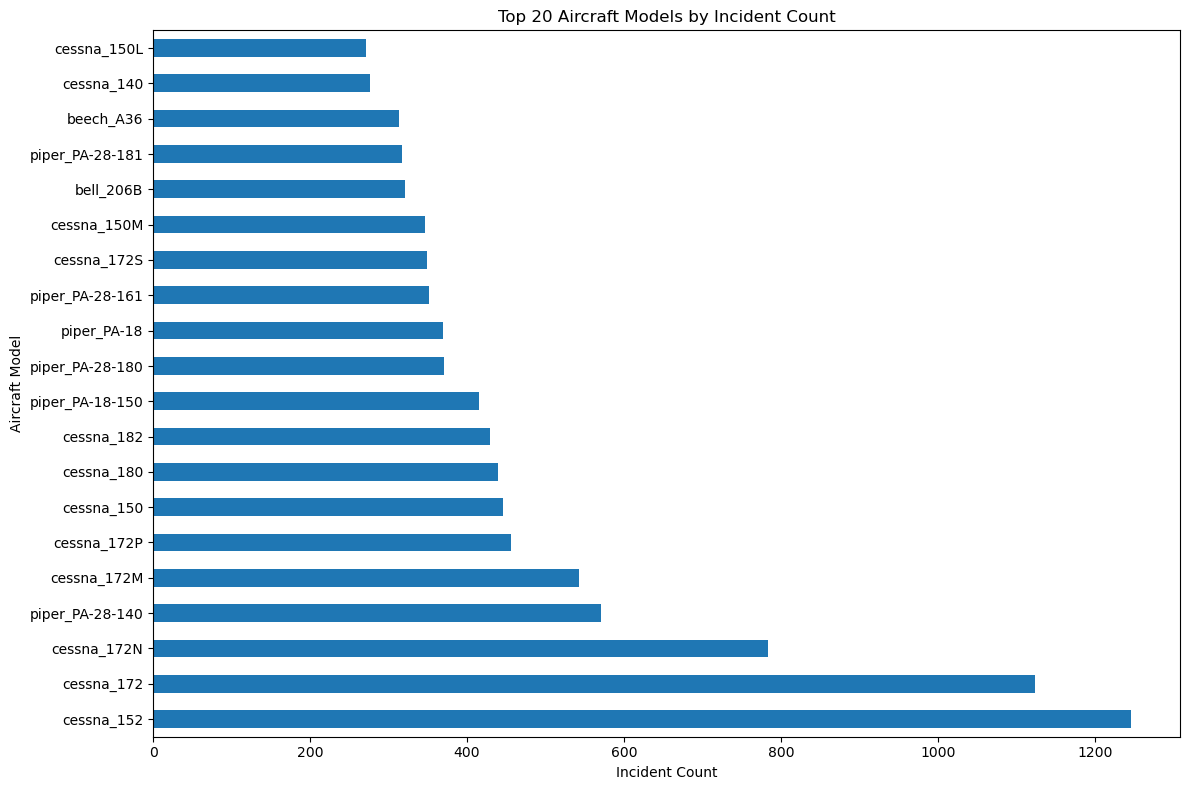

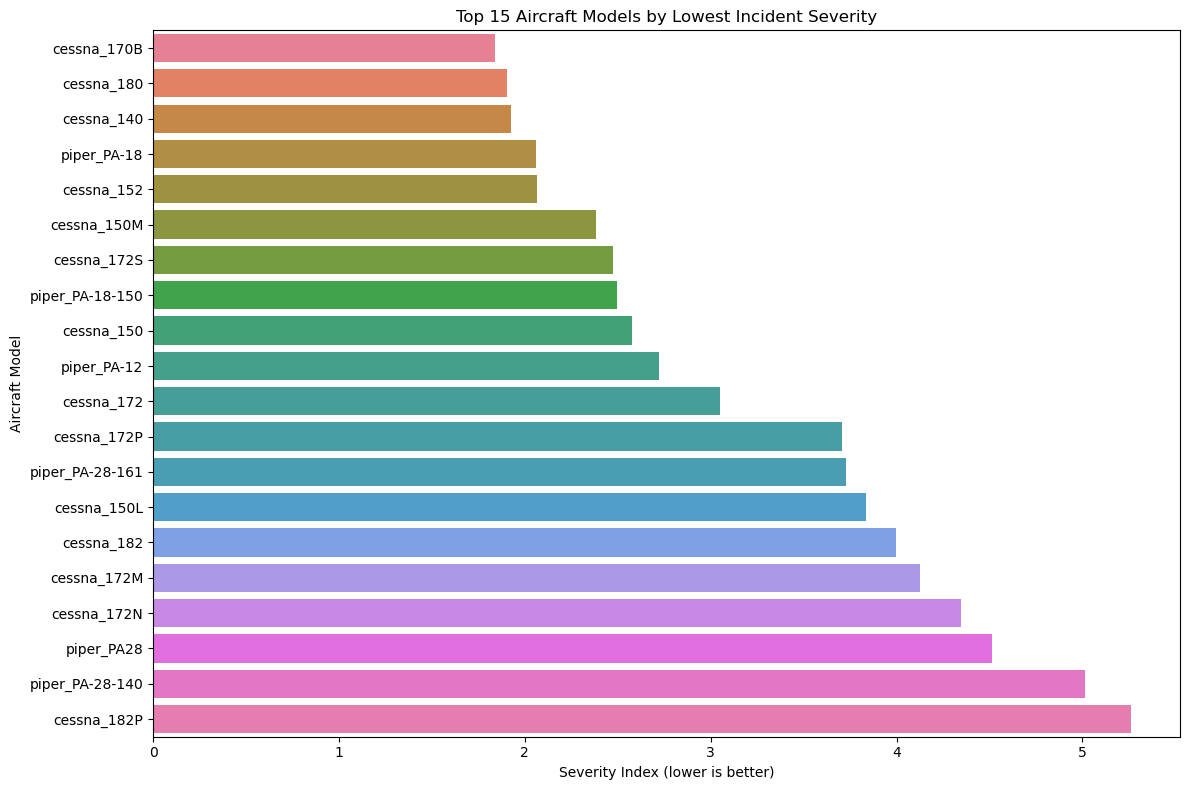

In [688]:
df['Aircraft'].value_counts().head(20).plot(kind='barh', figsize=(12, 8))
plt.title('Top 20 Aircraft Models by Incident Count')
plt.xlabel('Incident Count')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.savefig('./images/Incident_Count_vs_Aircraft.png')


#severity index with weighting
df['Severity.Index'] = (
    (df['Total.Fatal.Injuries'] * 10) +
    (df['Total.Serious.Injuries'] * 5) + 
    (df['Total.Minor.Injuries'] * 1)
)


aircraft_severity_df = df.groupby('Aircraft').agg({
    'Event.Id': 'count',
    'Severity.Index': 'mean',
    'Total.Injury.Rate': 'mean',
}).reset_index()

#get only aircrafts with more than 10 incidents
aircraft_severity_df = aircraft_severity_df[aircraft_severity_df['Event.Id'] >= 200].sort_values('Severity.Index')

plt.figure(figsize=(12, 8))
sns.barplot(x='Severity.Index', y='Aircraft', data=aircraft_severity_df.head(20), hue='Aircraft', legend=False)
plt.title('Top 15 Aircraft Models by Lowest Incident Severity')
plt.xlabel('Severity Index (lower is better)')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.savefig('./images/Severity.Index_vs_Aircraft.png')
plt.show()


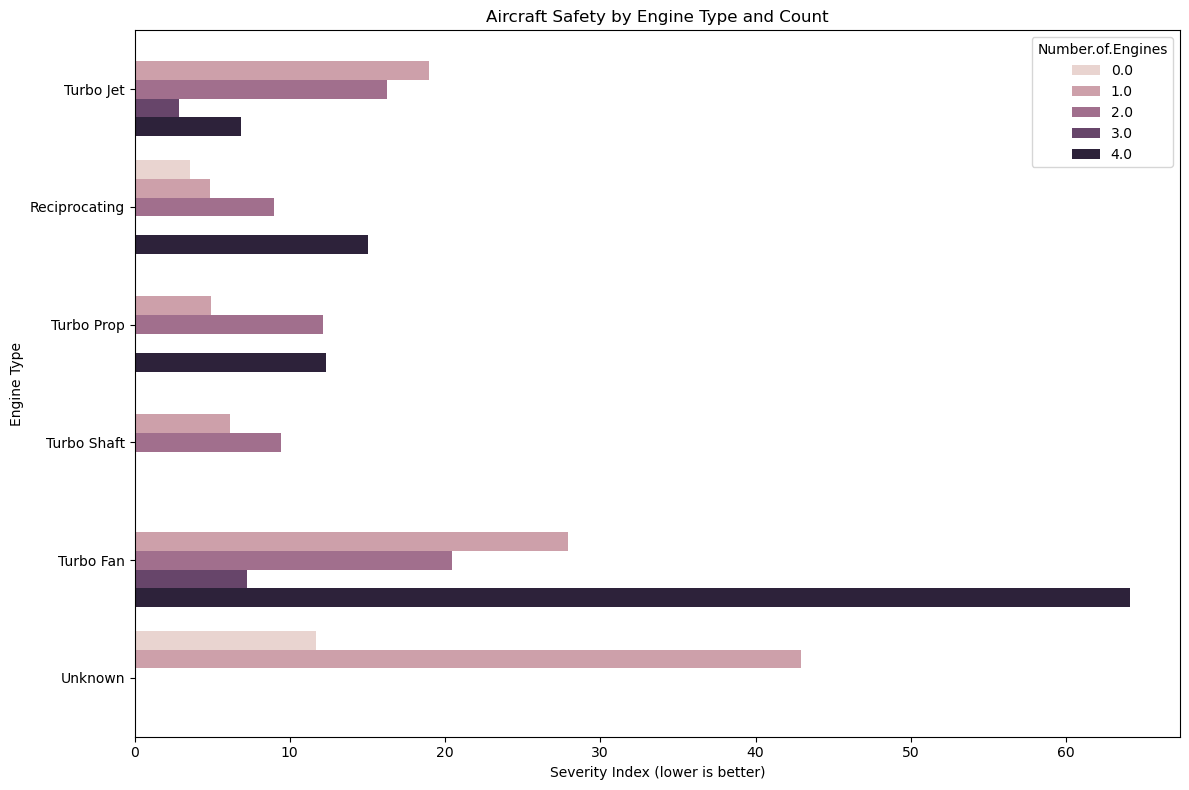

In [689]:
# Group by engine type and number of engines
engine_group = df.groupby(['Engine.Type', 'Number.of.Engines']).agg({
    'Event.Id': 'count',
    'Severity.Index': 'mean',
}).reset_index()

#get groups with at least 10 incidents
engine_group = engine_group[engine_group['Event.Id'] >= 10].sort_values('Severity.Index')

plt.figure(figsize=(12, 8))
sns.barplot(x='Severity.Index', y='Engine.Type', hue='Number.of.Engines', 
            data=engine_group)
plt.title('Aircraft Safety by Engine Type and Count')
plt.xlabel('Severity Index (lower is better)')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.savefig('./images/Severity.Index_vs_EngineType.png')
plt.show()



Key findings from engine type safety analysis:
- Turbo Jet engines with 3 engines show lowest severity index.
- Reciprocating engines with 0-1 engines have relatively low severity
- Turbo Fan engines with 4 engines show highest severity index
- Multi-engine aircraft generally show higher severity indices than single-engine

Recommendations:
- For large aircraft needs, prioritize **3-engine Turbo Jet** aircrafts as they have the lowest severity index of all
- Stay away from aircraft **with 4-engine Turbo Fan** aircrafts as they prove to have the highest severity index
- For smaller training and low passenger purposes, **1-engine Reciprocating** aircrafts offer the best safety profile

Text(0, 0.5, 'Purpose of Flight')

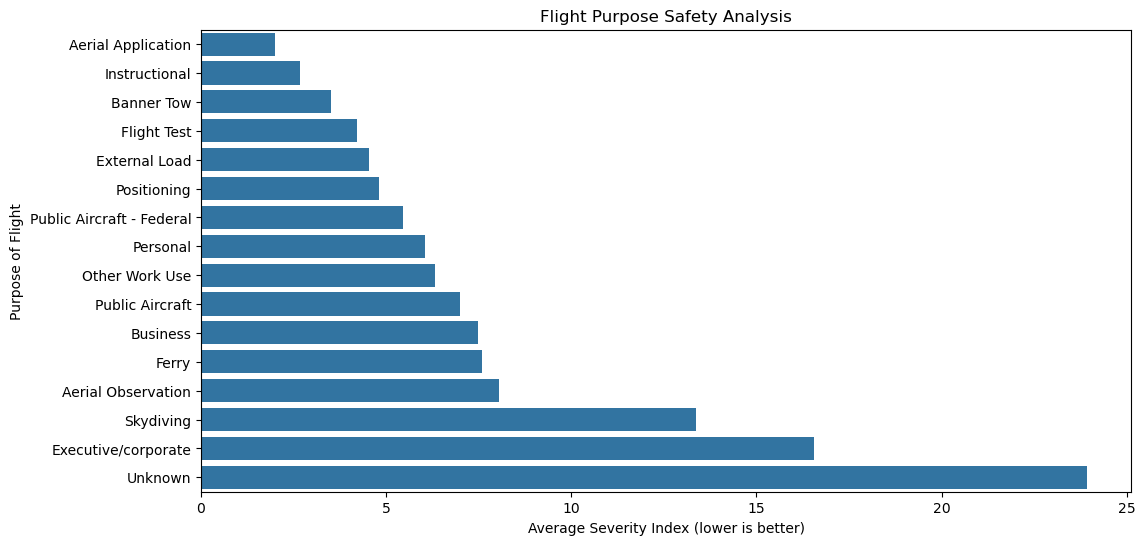

In [690]:
# Group by flight purpose and calculate safety metrics
purpose_safety = df.groupby('Purpose.of.flight').agg({
    'Event.Id': 'count',
    'Severity.Index': 'mean',
    'Total.Injury.Rate': 'mean'
}).sort_values('Severity.Index')

# Filter for significant sample size (at least 100 incidents)
purpose_safety = purpose_safety[purpose_safety['Event.Id'] >= 100]

# Plot flight purposes by severity
plt.figure(figsize=(12, 6))
sns.barplot(x='Severity.Index', y=purpose_safety.index, data=purpose_safety)
plt.title('Flight Purpose Safety Analysis')
plt.xlabel('Average Severity Index (lower is better)')
plt.ylabel('Purpose of Flight')



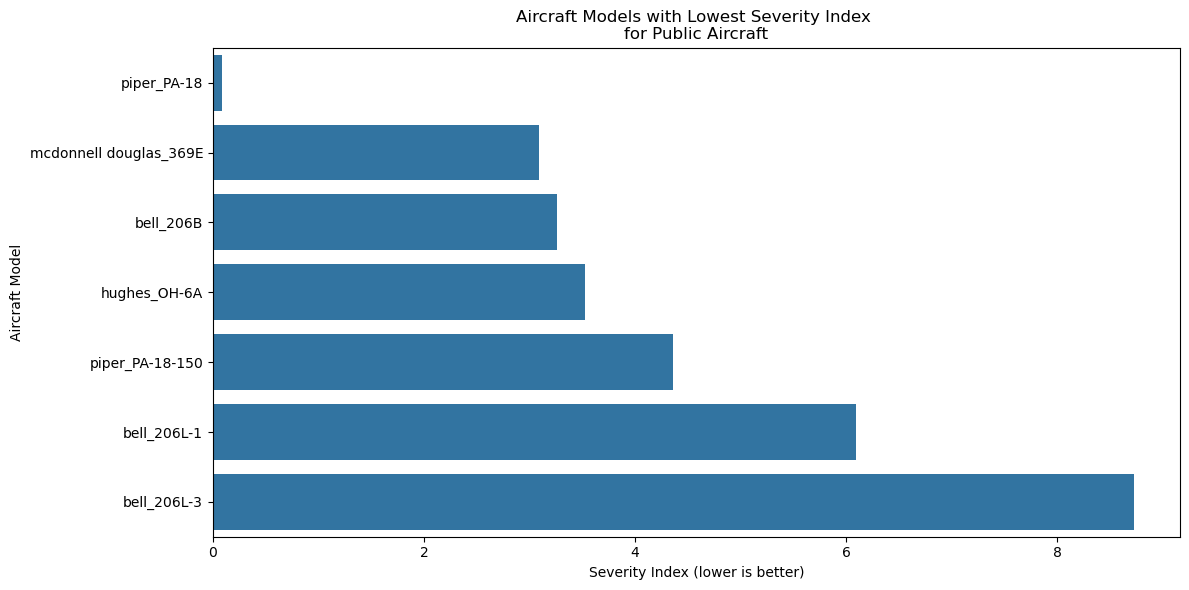

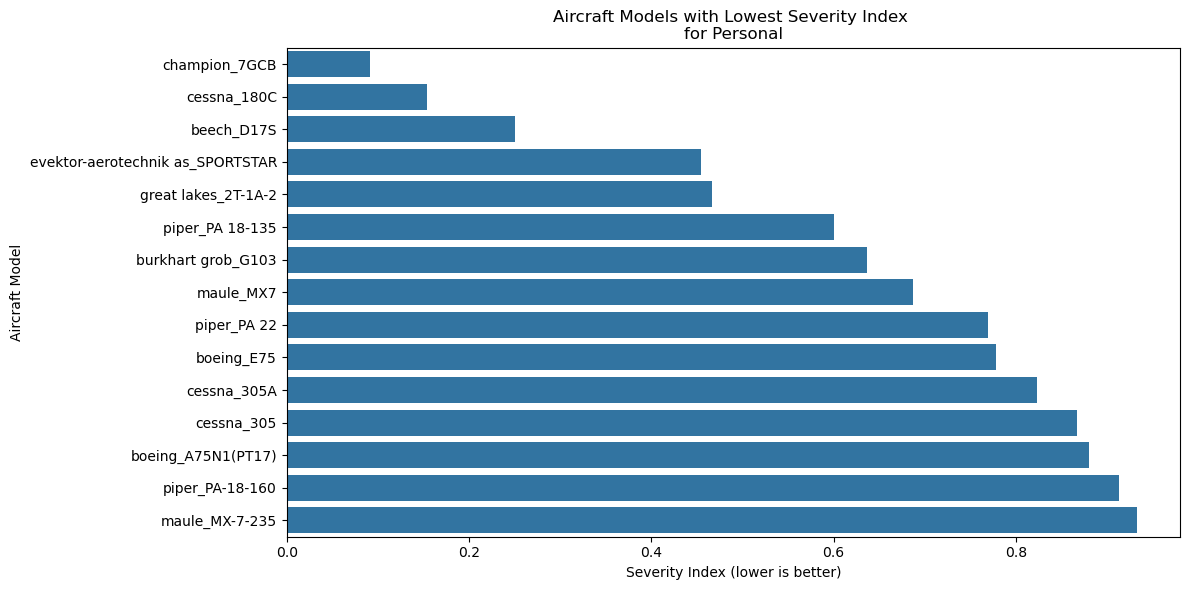

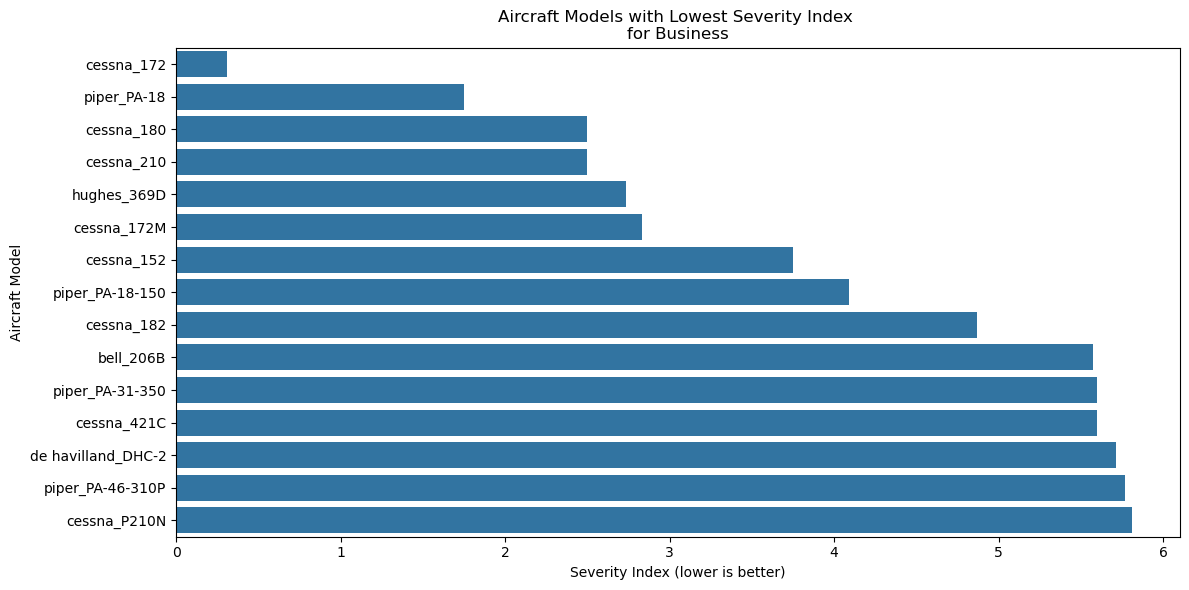

In [691]:
# Function to plot single purpose
def plot_aircraft_by_purpose(purpose, min_incidents=10):
    # Filter data for the specific purpose
    purpose_data = df[df['Purpose.of.flight'] == purpose].groupby('Aircraft').agg({
        'Event.Id': 'count',
        'Severity.Index': 'mean'
    }).reset_index()
    
    # Filter for minimum number of incidents
    purpose_data = purpose_data[purpose_data['Event.Id'] >= min_incidents].sort_values('Severity.Index')
    
    # Create the plot
    plt.figure(figsize=(12, 6))
    sns.barplot(data=purpose_data.head(15), 
                x='Severity.Index', 
                y='Aircraft')
    
    plt.title(f'Aircraft Models with Lowest Severity Index \nfor {purpose}')
    plt.xlabel('Severity Index (lower is better)')
    plt.ylabel('Aircraft Model')
    plt.tight_layout()
    plt.show()

# Plot for a few interesting purposes
purposes = ['Public Aircraft', 'Personal', 'Business']
for purpose in purposes:
    plot_aircraft_by_purpose(purpose)


 - **Public Aircraft** operations show the lowest overall severity index among major flight purposes
 - For **Personal** use, aircraft like cessna_180c demonstrate exceptional safety records
 - **Business** flights show slightly higher severity indices overall compared to personal flight.
 - For Public Aircraft operations, the data supports *piper_pa* series as particularly low-risk options

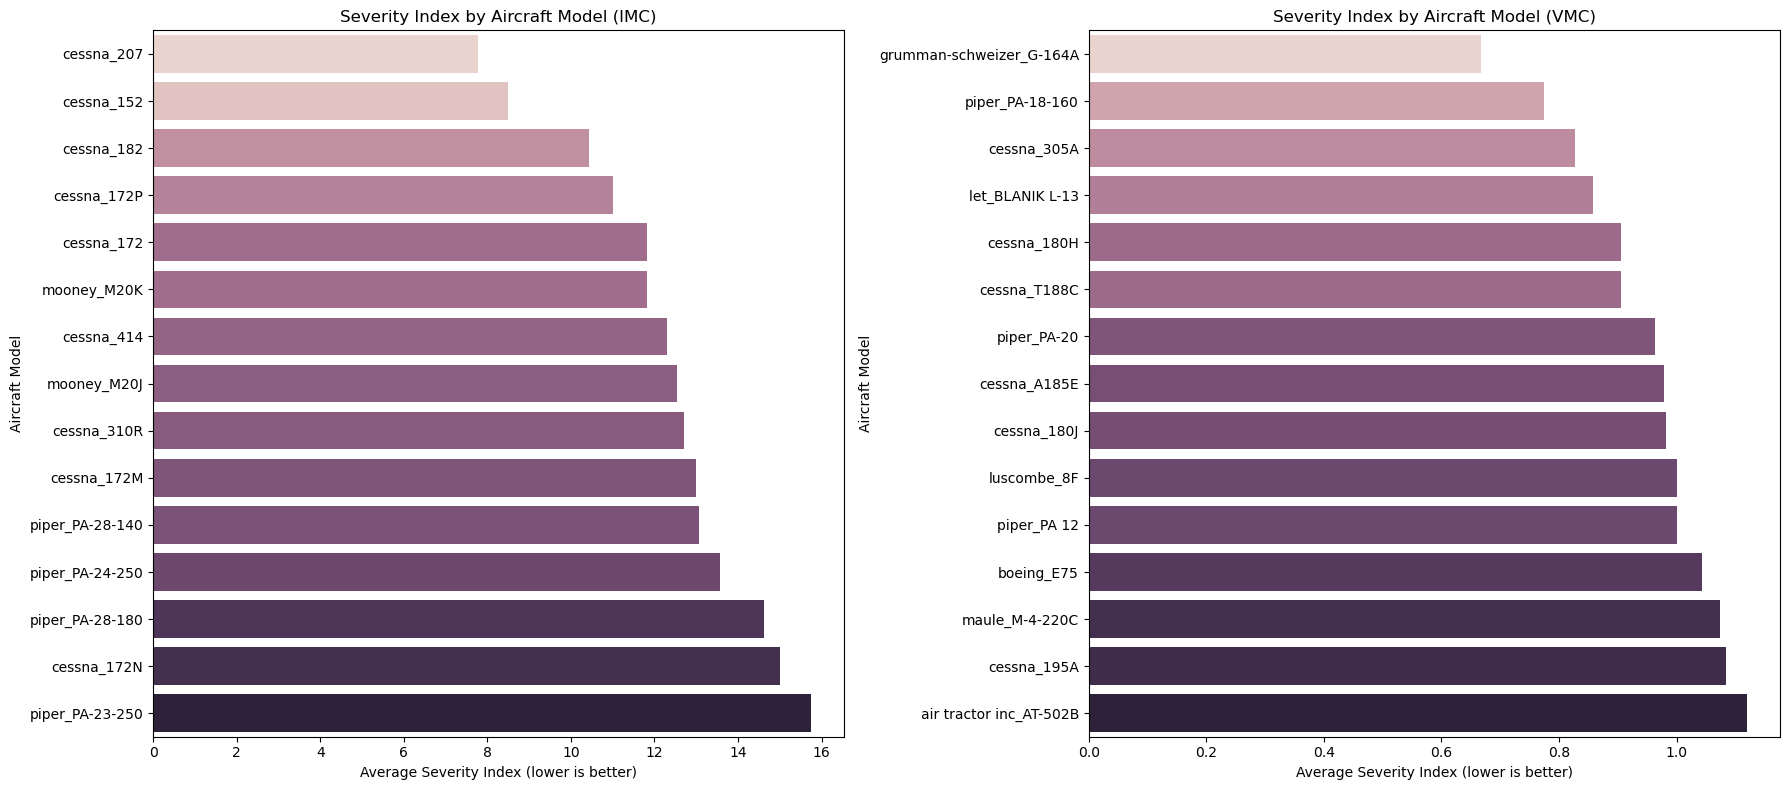

In [692]:
aircraft_weather = df.groupby(['Aircraft', 'Weather.Condition']).agg(
    {
           'Event.Id': 'count',
        'Severity.Index': 'mean'
    }
).reset_index()


aircraft_weather = aircraft_weather[aircraft_weather['Event.Id'] > 20]
top15_imc = aircraft_weather[aircraft_weather['Weather.Condition'] == 'IMC'].sort_values('Severity.Index').head(15)
top15_vmc = aircraft_weather[aircraft_weather['Weather.Condition'] == 'VMC'].sort_values('Severity.Index').head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=False)
sns.barplot(
    x='Severity.Index', y='Aircraft',
    data=top15_imc, ax=axes[0],
    hue='Severity.Index',
    legend=False,
)

#imc plot
axes[0].set_title("Severity Index by Aircraft Model (IMC)")
axes[0].set_xlabel("Average Severity Index (lower is better)")
axes[0].set_ylabel("Aircraft Model")

sns.barplot(
    x='Severity.Index', y='Aircraft',
    data=top15_vmc, ax=axes[1],
    hue='Severity.Index',
    legend=False,
)

#vmc plot
axes[1].set_title("Severity Index by Aircraft Model (VMC)")
axes[1].set_xlabel("Average Severity Index (lower is better)")
axes[1].set_ylabel("Aircraft Model")
plt.savefig('./images/IMC_VMC_Severity.png')
plt.tight_layout()
plt.show()

In [693]:
missing_percentage = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)
print("\nMissing Values %age:\n")
print(missing_percentage)

#drop all columns wth more than 50% missing values
df = df.loc[:, missing_percentage[missing_percentage < 50].index]

#drop columns of no interest and high missing value %age
df.drop(columns=['Airport.Code', 'Airport.Name','Publication.Date', 'Registration.Number', 'Amateur.Built', 'Broad.phase.of.flight'], inplace=True)
print(f"\n\nData shape after dropping columns: {df.shape}")


Missing Values %age:

Total.Injury.Rate               0.052111
Total.Serious.Injuries          0.000000
Total.Minor.Injuries            0.000000
Severity.Score                  0.000000
Injury.Severity.Standardized    0.000000
Aircraft                        0.000000
Event.Id                        0.000000
Accident.Number                 0.000000
Event.Date                      0.000000
Investigation.Type              0.000000
Location                        0.000000
Make                            0.000000
Model                           0.000000
Country                         0.000000
Injury.Severity                 0.000000
Aircraft.damage                 0.000000
Weather.Condition               0.000000
Total.Uninjured                 0.000000
Number.of.Engines               0.000000
Purpose.of.flight               0.000000
Report.Status                   0.000000
Engine.Type                     0.000000
Total.Fatal.Injuries            0.000000
Severity.Index                  0.

KeyError: "['Airport.Code', 'Airport.Name', 'Publication.Date', 'Registration.Number', 'Amateur.Built', 'Broad.phase.of.flight'] not found in axis"

 - Dropped 9 columns bringing our currenty useful columns to 22; no rows dropped yet

Since aircraft identification is crucial, we'll drop rows with missing `Make` or `Model` values, which were a negligible percentage of `0.103500` and `0.070875` respectively, so we don't expect a huge loss of incidences. We'll also drop missing and unknown damage 

In [ ]:
#length before dropping any rows
df_length = len(df)

df.dropna(subset=['Make', 'Model', 'Weather.Condition','Aircraft.damage', 'Injury.Severity'], inplace=True)
print(f"Records after dropping missing records: {df.shape}")
print(f"Dropped {df_length - len(df)} records")

Records after dropping missing records: (82254, 19)
Dropped 6635 records


In [ ]:
#assume data was missing and never reported
injury_columns = ['Total.Serious.Injuries', 'Total.Minor.Injuries', 'Total.Fatal.Injuries', 'Total.Uninjured']
df = df.dropna(subset=injury_columns, how='all')
df[injury_columns] = df[injury_columns].fillna(0).astype(int)


For important columns with lots of missing values, we will fill them with relevant statistical values

In [ ]:

columns_to_fill = ['Country', 'Purpose.of.flight', 'Location', 'Report.Status', 'Number.of.Engines', 'Engine.Type']

for col in columns_to_fill:
        if df[col].isnull().sum() > 0:
            mode_val = df[col].mode()[0]
            missing_count = df[col].isnull().sum()
            df.fillna({col: mode_val}, inplace=True)
            print(f"Filled {missing_count} missing values in {col} with '{mode_val}'")
    
print("\nAfter handling missing values:")
print(df[columns_to_fill].isnull().sum())

Filled 207 missing values in Country with 'United States'
Filled 2247 missing values in Purpose.of.flight with 'Personal'
Filled 43 missing values in Location with 'ANCHORAGE, AK'
Filled 2547 missing values in Report.Status with 'Probable Cause'
Filled 2791 missing values in Number.of.Engines with '1.0'
Filled 3223 missing values in Engine.Type with 'Reciprocating'

After handling missing values:
Country              0
Purpose.of.flight    0
Location             0
Report.Status        0
Number.of.Engines    0
Engine.Type          0
dtype: int64


In [ ]:
print(f"Records after dropping missing records: {df.shape}")

Records after dropping missing records: (82176, 19)


After handling missing values:
- Dropped columns with a high missing %age and not useful to our analysis
- Dropped rows with missing data as they're essential for aircraft-risk value analysis
- Filled missing rows with mode values
- Current dataset has `82302` rows and `20` columns

In [ ]:
df.isnull().sum()

Total.Serious.Injuries    0
Total.Minor.Injuries      0
Total.Fatal.Injuries      0
Engine.Type               0
Report.Status             0
Purpose.of.flight         0
Number.of.Engines         0
Total.Uninjured           0
Weather.Condition         0
Aircraft.damage           0
Injury.Severity           0
Country                   0
Model                     0
Make                      0
Location                  0
Investigation.Type        0
Event.Date                0
Accident.Number           0
Event.Id                  0
dtype: int64

Dropping duplicate records


In [ ]:
duplicate_count = df.duplicated(subset=['Event.Id']).sum()
print(f" - Duplicate records before dropping: {duplicate_count}")
df = df.drop_duplicates(subset=['Event.Id'], keep='first')
print(f" - Duplicate records after dropping: {df.duplicated(subset=['Event.Id']).sum()}")


 - Duplicate records before dropping: 812
 - Duplicate records after dropping: 0


In [ ]:
df['Aircraft'] = df.apply(lambda x: f"{x['Make'].lower()}_{x['Model']}".strip(), axis=1)
df['Total.Injury.Rate'] = (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries']) / (df['Total.Fatal.Injuries'] + df['Total.Serious.Injuries'] + df['Total.Minor.Injuries'] + df['Total.Uninjured']) * 100


In [ ]:
df['Event.Date'] = pd.to_datetime(df['Event.Date'])
df = df[df['Event.Date'].dt.year >= 1990]

In [ ]:
def standardize_injury_severity(severity):
    if pd.isna(severity):
        return 'Unknown'
    elif 'Fatal' in severity:
        return 'Fatal'
    elif 'Non-Fatal' in severity:
        return 'Non-Fatal'
    else:
        return 'No Injury'

df['Injury.Severity.Standardized'] = df['Injury.Severity'].apply(standardize_injury_severity)
print("\nUnique standardized injury severities:")
print(df['Injury.Severity.Standardized'].value_counts())



Unique standardized injury severities:
Injury.Severity.Standardized
Fatal        56596
No Injury      973
Name: count, dtype: int64


In [ ]:

def calculate_severity_score(row):
    score = 0
    
    if row['Total.Fatal.Injuries'] > 0:
        score += 3
    
    if row['Total.Serious.Injuries'] > 0:
        score += 2
        
    if row['Total.Minor.Injuries'] > 0:
        score += 1
        
    return min(score, 5) 

df['Severity.Score'] = df.apply(calculate_severity_score, axis=1)
print("\nSeverity score distribution:")
print(df['Severity.Score'].value_counts().sort_index())
df['Severity.Score']


Severity score distribution:
Severity.Score
0    31138
1     7470
2     5893
3    11276
4      645
5     1147
Name: count, dtype: int64


24691    0
24693    1
24694    0
24695    0
24696    0
        ..
88859    0
88865    0
88873    0
88877    2
88886    0
Name: Severity.Score, Length: 57569, dtype: int64

In [ ]:
df.iloc[:20]

,Total.Serious.Injuries,Total.Minor.Injuries,Total.Fatal.Injuries,Engine.Type,Report.Status,Purpose.of.flight,Number.of.Engines,Total.Uninjured,Weather.Condition,Aircraft.damage,...,Make,Location,Investigation.Type,Event.Date,Accident.Number,Event.Id,Aircraft,Total.Injury.Rate,Injury.Severity.Standardized,Severity.Score
24691,0,0,0,Reciprocating,Probable Cause,Personal,1.0,2,VMC,Substantial,...,Cessna,"ELKHART, IN",Accident,1990-01-01,CHI90LA059,20001212X22389,cessna_150F,0.0,Fatal,0
24693,0,1,0,Reciprocating,Probable Cause,Instructional,1.0,0,VMC,Substantial,...,Cessna,"MILLIS, MA",Accident,1990-01-02,NYC90LA044,20001212X22482,cessna_150,100.0,Fatal,1
24694,0,0,0,Reciprocating,Probable Cause,Instructional,1.0,5,VMC,Minor,...,Cessna,"APPLE VALLEY, CA",Accident,1990-01-03,LAX90LA063B,20001212X22431,cessna_172M,0.0,Fatal,0
24695,0,0,0,Reciprocating,Probable Cause,Personal,1.0,1,VMC,Substantial,...,Aeronca,"SLIPPERY ROCK, PA",Accident,1990-01-03,NYC90LA045,20001212X22483,aeronca_11CC,0.0,Fatal,0
24696,0,0,0,Reciprocating,Probable Cause,Personal,1.0,2,VMC,Substantial,...,Steele,"PENN YAN, NY",Accident,1990-01-03,NYC90DFJ01,20001212X22476,steele_ACROSPORT II,0.0,Fatal,0
24698,0,0,0,Reciprocating,Probable Cause,Instructional,1.0,1,VMC,Substantial,...,Cessna,"WHITEVILLE, NC",Accident,1990-01-03,ATL90LA045,20001212X22364,cessna_152,0.0,Fatal,0
24699,0,0,0,Reciprocating,Probable Cause,Unknown,1.0,2,VMC,Substantial,...,Piper,"PETERSBURG, VA",Accident,1990-01-03,BFO90LA019,20001212X22376,piper_PA-28R-200,0.0,Fatal,0
24700,0,0,0,Turbo Jet,Probable Cause,Unknown,3.0,145,VMC,Minor,...,Boeing,"MADISON, FL",Incident,1990-01-04,MIA90IA047,20001212X22451,boeing_727-251,0.0,No Injury,0
24701,0,2,0,Reciprocating,Probable Cause,Personal,1.0,0,IMC,Destroyed,...,Cessna,"HAMMOND, LA",Accident,1990-01-04,FTW90LA049,20001212X22418,cessna_172E,100.0,Fatal,1
24702,2,0,0,Reciprocating,Probable Cause,Personal,2.0,0,IMC,Destroyed,...,Piper,"TALLAHASSEE, FL",Accident,1990-01-05,MIA90FA050,20001212X22449,piper_PA-30,100.0,Fatal,2


#### Objective 1: Identify engine configurations with lowest severity index


We'll analyze the relationship between engine types and numbers to establish which engines have the strongest safety records.

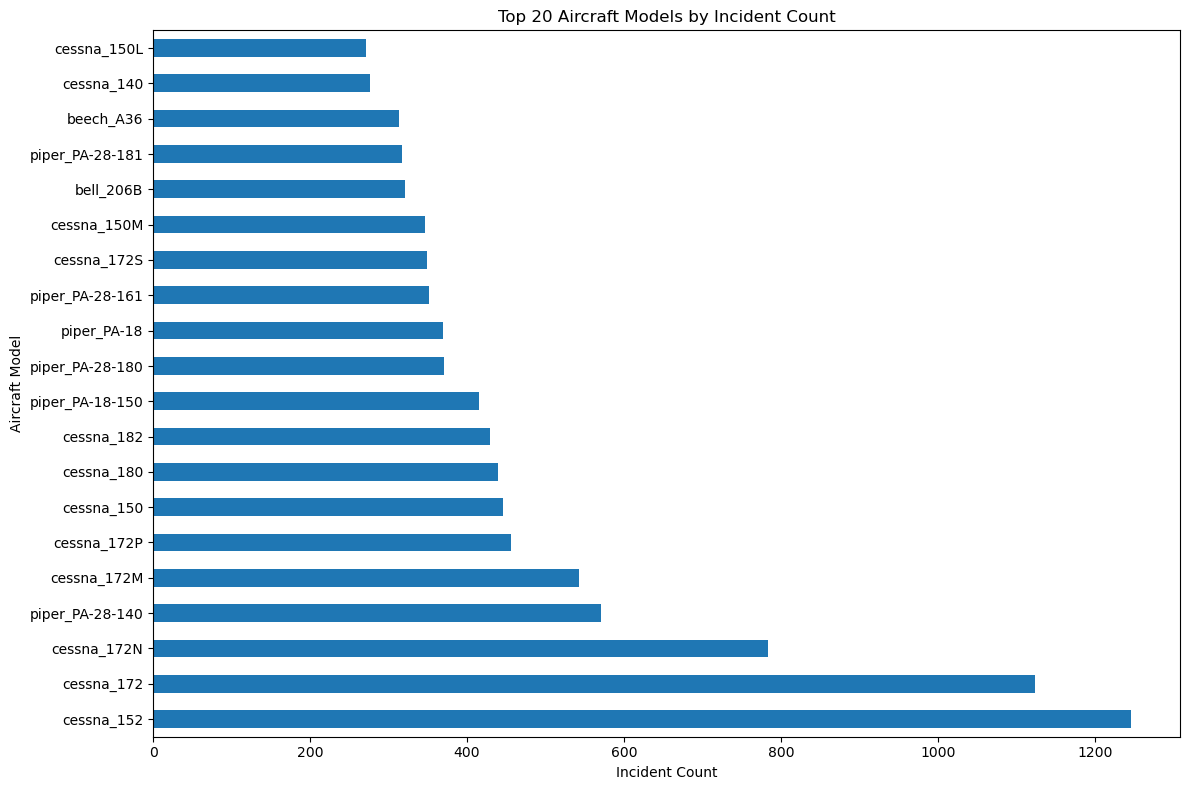

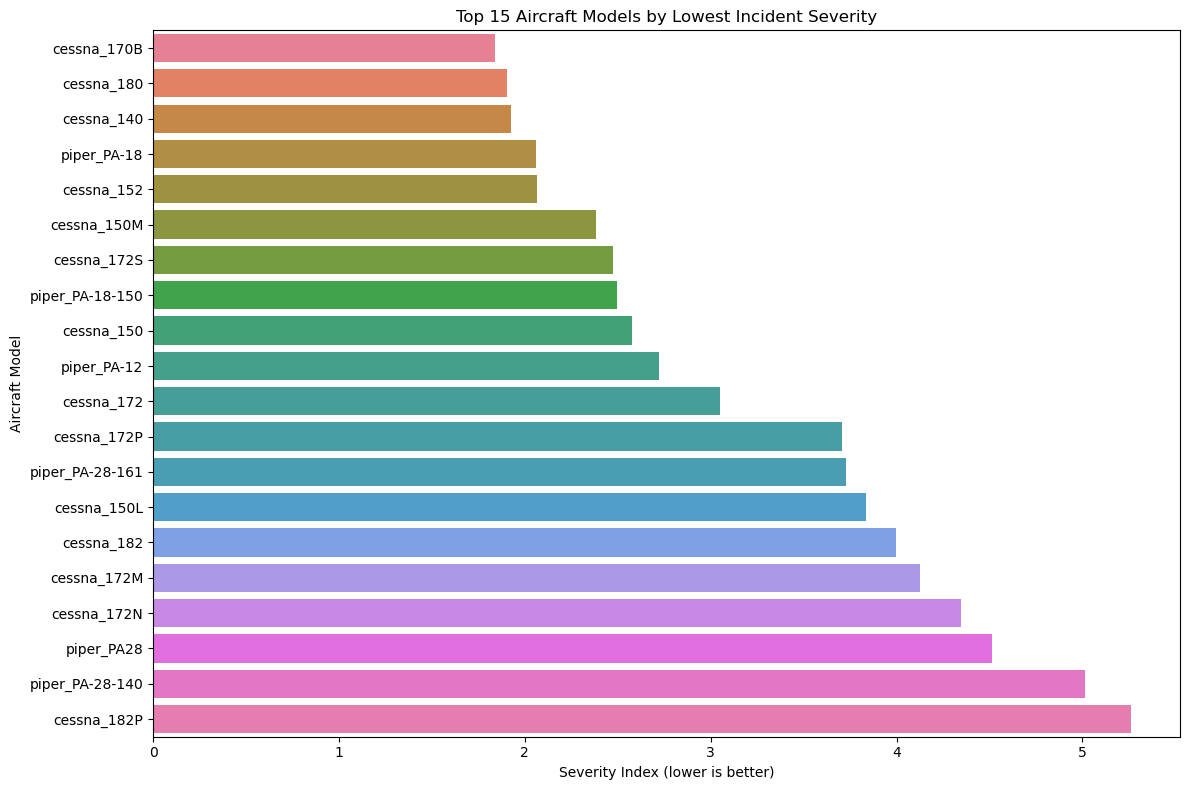

In [ ]:
df['Aircraft'].value_counts().head(20).plot(kind='barh', figsize=(12, 8))
plt.title('Top 20 Aircraft Models by Incident Count')
plt.xlabel('Incident Count')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.savefig('./images/Incident_Count_vs_Aircraft.png')


#severity index with weighting
df['Severity.Index'] = (
    (df['Total.Fatal.Injuries'] * 10) +
    (df['Total.Serious.Injuries'] * 5) + 
    (df['Total.Minor.Injuries'] * 1)
)


aircraft_severity_df = df.groupby('Aircraft').agg({
    'Event.Id': 'count',
    'Severity.Index': 'mean',
    'Total.Injury.Rate': 'mean',
}).reset_index()

#get only aircrafts with more than 10 incidents
aircraft_severity_df = aircraft_severity_df[aircraft_severity_df['Event.Id'] >= 200].sort_values('Severity.Index')

plt.figure(figsize=(12, 8))
sns.barplot(x='Severity.Index', y='Aircraft', data=aircraft_severity_df.head(20), hue='Aircraft', legend=False)
plt.title('Top 15 Aircraft Models by Lowest Incident Severity')
plt.xlabel('Severity Index (lower is better)')
plt.ylabel('Aircraft Model')
plt.tight_layout()
plt.savefig('./images/Severity.Index_vs_Aircraft.png')
plt.show()


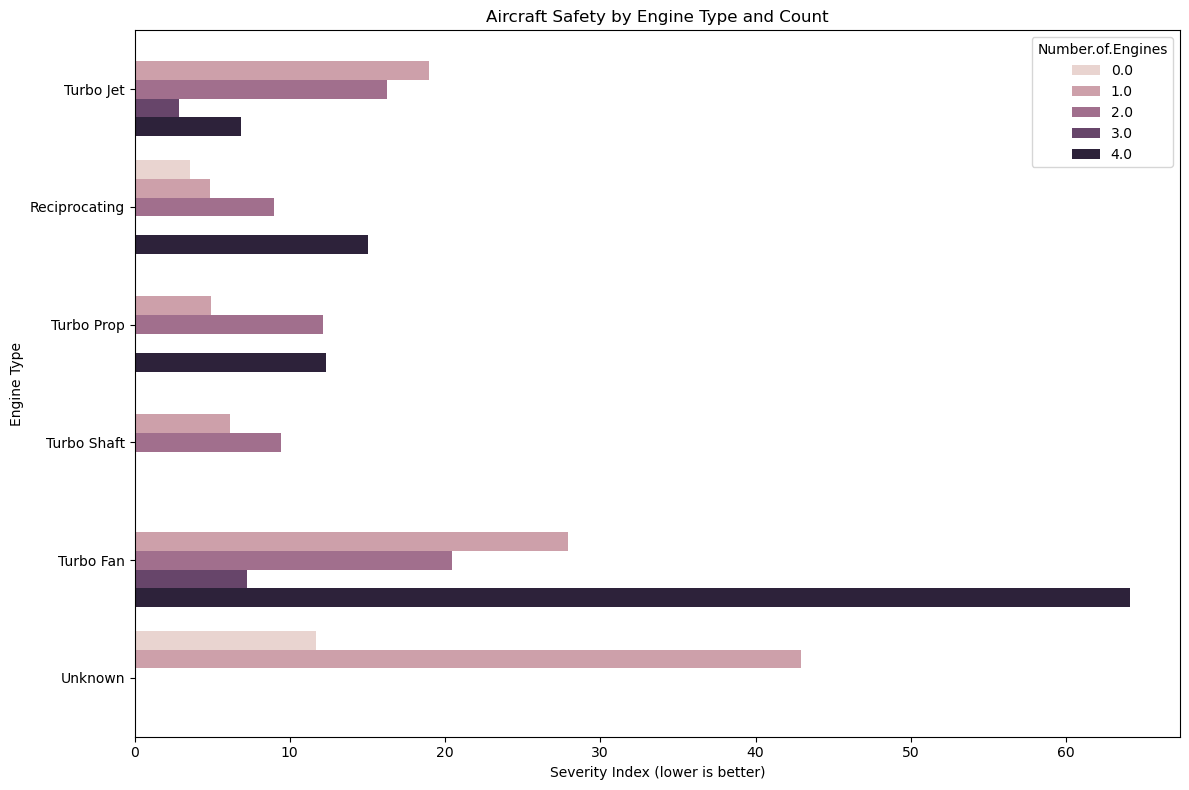

In [ ]:
engine_group = df.groupby(['Engine.Type', 'Number.of.Engines']).agg({
    'Event.Id': 'count',
    'Severity.Index': 'mean',
}).reset_index()

#get groups with at least 10 incidents
engine_group = engine_group[engine_group['Event.Id'] >= 10].sort_values('Severity.Index')

plt.figure(figsize=(12, 8))
sns.barplot(x='Severity.Index', y='Engine.Type', hue='Number.of.Engines', 
            data=engine_group)
plt.title('Aircraft Safety by Engine Type and Count')
plt.xlabel('Severity Index (lower is better)')
plt.ylabel('Engine Type')
plt.tight_layout()
plt.savefig('./images/Severity.Index_vs_EngineType.png')
plt.show()



Key findings from engine type safety analysis:
- Turbo Jet engines with 3 engines show lowest severity index.
- Reciprocating engines with 0-1 engines have relatively low severity
- Turbo Fan engines with 4 engines show highest severity index
- Multi-engine aircraft generally show higher severity indices than single-engine

Recommendations:
- For large aircraft needs, prioritize **3-engine Turbo Jet** aircrafts as they have the lowest severity index of all
- Stay away from aircraft **with 4-engine Turbo Fan** aircrafts as they prove to have the highest severity index
- For smaller training and low passenger purposes, **1-engine Reciprocating** aircrafts offer the best safety profile

### Objective 2: Identifying low-risk operations and aircraft models associated

Different flight purposes have unique risk profiles and safety requirements. Our analysis categorized incidents by purpose to identify which aircraft models perform best for specific operational needs like personal, business, or public service flights.

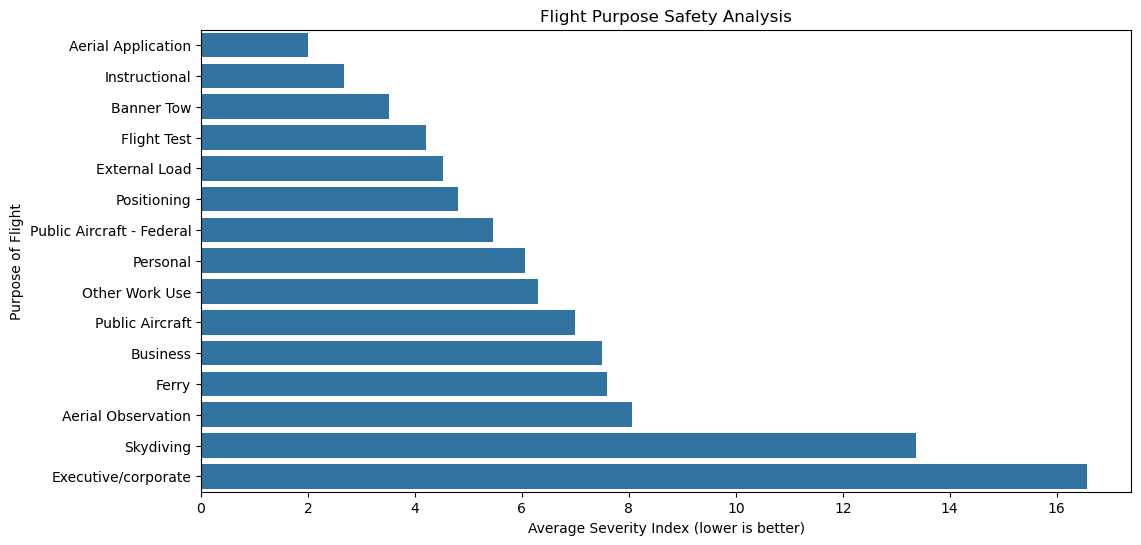

<Figure size 640x480 with 0 Axes>

In [ ]:
purpose_safety = df.groupby('Purpose.of.flight').agg({
    'Event.Id': 'count',
    'Severity.Index': 'mean',
    'Total.Injury.Rate': 'mean'
}).sort_values('Severity.Index')

purpose_safety = purpose_safety[(purpose_safety['Event.Id'] >= 100) & 
    (purpose_safety.index != 'Unknown')].sort_values('Severity.Index')

plt.figure(figsize=(12, 6))
sns.barplot(x='Severity.Index', y=purpose_safety.index, data=purpose_safety)
plt.title('Flight Purpose Safety Analysis')
plt.xlabel('Average Severity Index (lower is better)')
plt.ylabel('Purpose of Flight')
plt.show()
plt.savefig('./images/Severity.Index_vs_Purpose.png')
plt.tight_layout()


Analysis shows instructional and aerial application flights have the lowest severity indices, while executive/corporate and skydiving operations show higher risk profiles. This pattern suggests that **training** and **agricultural** operations tend to have better safety records compared to more complex mission types. 

 - Next we are going to analyze aircrafts by purpose and see those suited for specific purpose relevant to our business

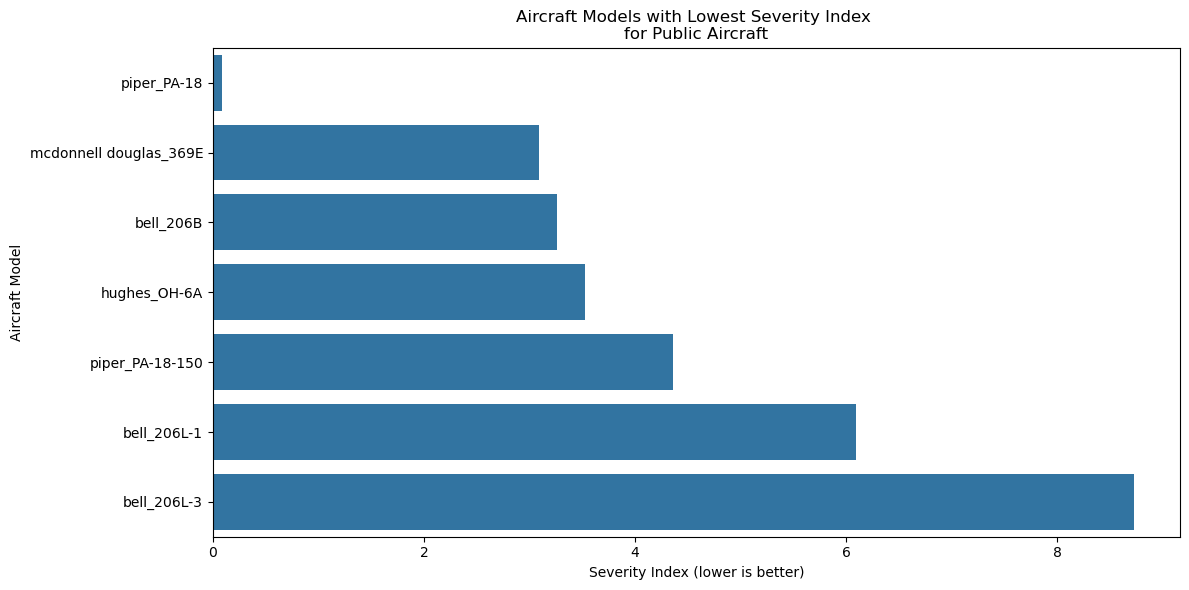

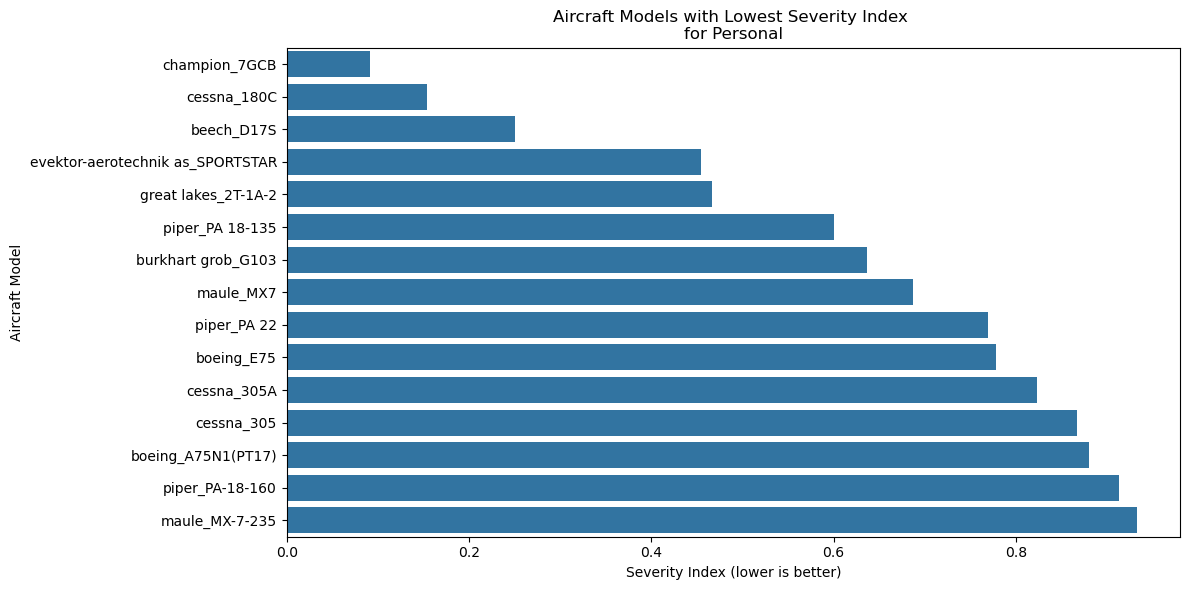

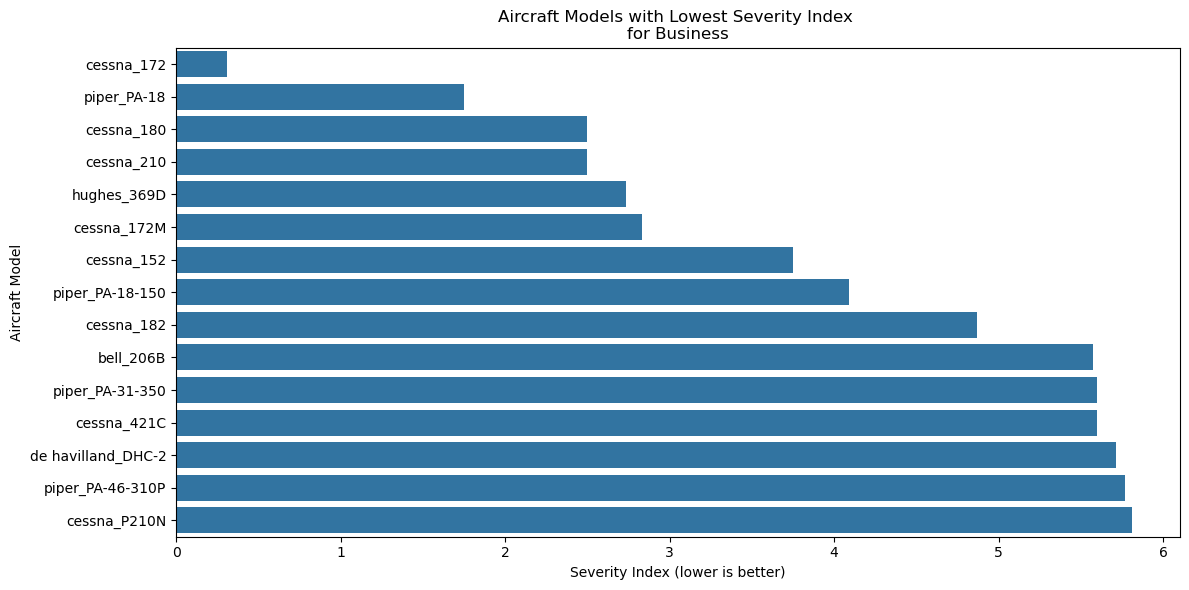

In [ ]:
def plot_aircraft_by_purpose(purpose, min_incidents=10):
    purpose_data = df[df['Purpose.of.flight'] == purpose].groupby('Aircraft').agg({
        'Event.Id': 'count',
        'Severity.Index': 'mean'
    }).reset_index()
    
    purpose_data = purpose_data[purpose_data['Event.Id'] >= min_incidents].sort_values('Severity.Index')
    
    plt.figure(figsize=(12, 6))
    sns.barplot(data=purpose_data.head(15), 
                x='Severity.Index', 
                y='Aircraft')
    
    plt.title(f'Aircraft Models with Lowest Severity Index \nfor {purpose}')
    plt.xlabel('Severity Index (lower is better)')
    plt.ylabel('Aircraft Model')
    plt.tight_layout()
    plt.show()

purposes = ['Public Aircraft', 'Personal', 'Business']
for purpose in purposes:
    plot_aircraft_by_purpose(purpose)


 - **Public Aircraft** operations show the lowest overall severity index among major flight purposes
 - For **Personal** use, aircraft like cessna_180c demonstrate exceptional safety records
 - **Business** flights show slightly higher severity indices overall compared to personal flight.
 - For Public Aircraft operations, the data supports *piper_pa* series as particularly low-risk options

### Objective 3: Identifying aircraft performance in different weather conditions

The weather conditions during flight significantly impact safety. We've analyzed how different aircraft models perform in two primary weather categories:

 - **IMC (Instrument Meteorological Conditions)**: Reduced visibility requiring instrument navigation
 - **VMC (Visual Meteorological Conditions)**: Good visibility allowing visual flight rules


In [ ]:
#replace missing and unknown values in Weather.Condition 
df['Weather.Condition'] = df['Weather.Condition'].fillna(df['Weather.Condition'].mode()[0])
df['Weather.Condition'] = df['Weather.Condition'].replace(['UNK', 'Unk'], df['Weather.Condition'].mode()[0])

print(df['Weather.Condition'].value_counts())


Weather.Condition
VMC    53830
IMC     3739
Name: count, dtype: int64


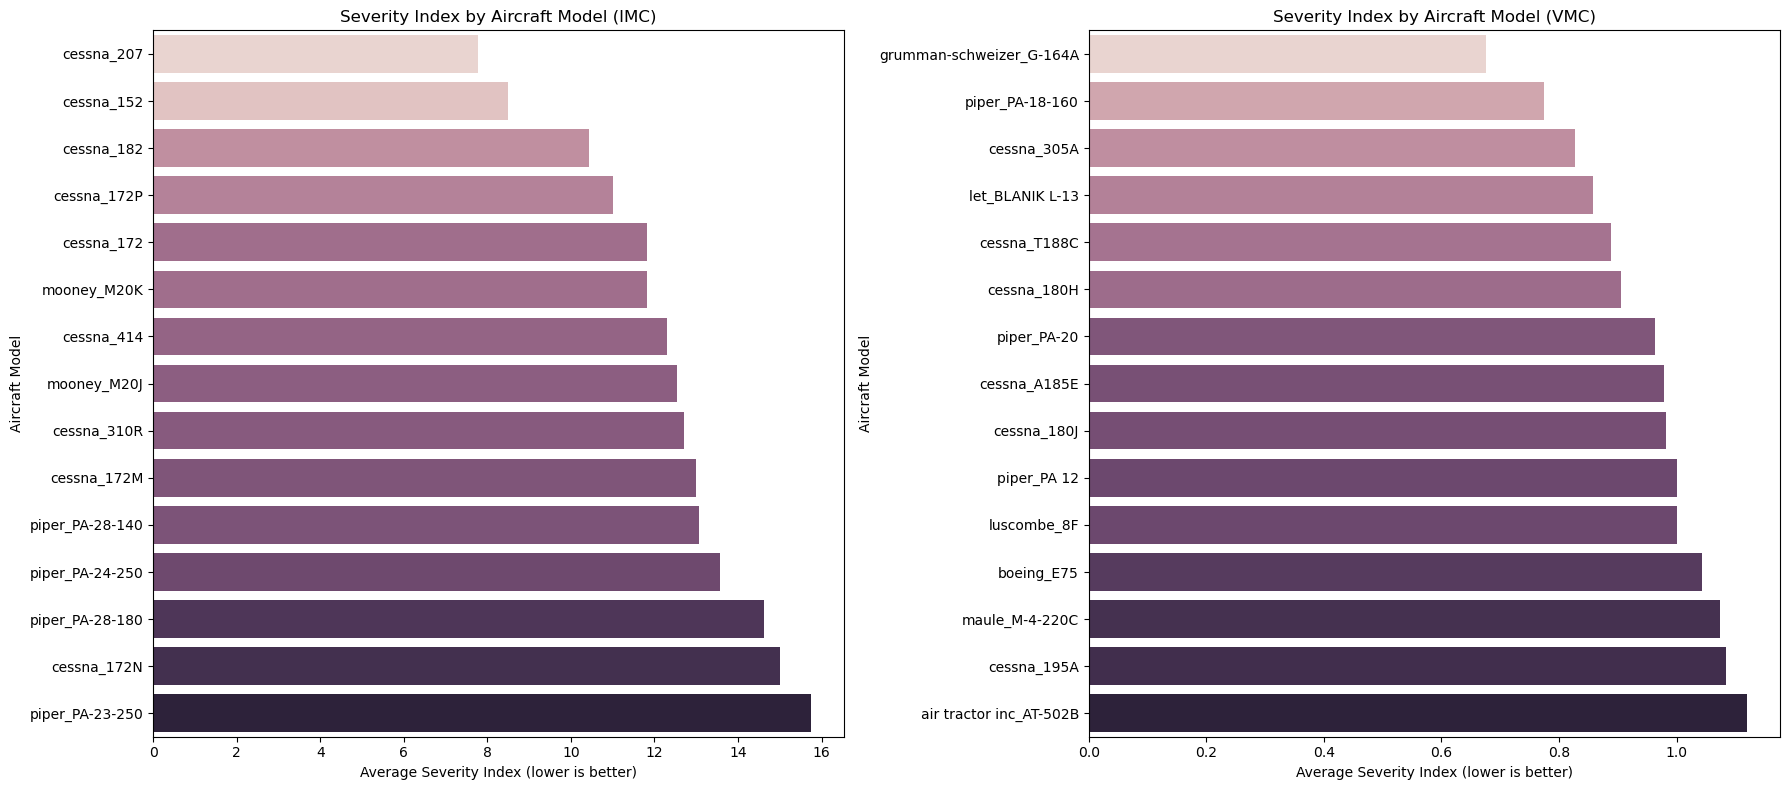

In [ ]:
aircraft_weather = df.groupby(['Aircraft', 'Weather.Condition']).agg(
    {
           'Event.Id': 'count',
        'Severity.Index': 'mean'
    }
).reset_index()


aircraft_weather = aircraft_weather[aircraft_weather['Event.Id'] > 20]
top15_imc = aircraft_weather[aircraft_weather['Weather.Condition'] == 'IMC'].sort_values('Severity.Index').head(15)
top15_vmc = aircraft_weather[aircraft_weather['Weather.Condition'] == 'VMC'].sort_values('Severity.Index').head(15)

fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharex=False)
sns.barplot(
    x='Severity.Index', y='Aircraft',
    data=top15_imc, ax=axes[0],
    hue='Severity.Index',
    legend=False,
)

#imc plot
axes[0].set_title("Severity Index by Aircraft Model (IMC)")
axes[0].set_xlabel("Average Severity Index (lower is better)")
axes[0].set_ylabel("Aircraft Model")

sns.barplot(
    x='Severity.Index', y='Aircraft',
    data=top15_vmc, ax=axes[1],
    hue='Severity.Index',
    legend=False,
)

#vmc plot
axes[1].set_title("Severity Index by Aircraft Model (VMC)")
axes[1].set_xlabel("Average Severity Index (lower is better)")
axes[1].set_ylabel("Aircraft Model")
plt.savefig('./images/IMC_VMC_Severity.png')
plt.tight_layout()
plt.show()

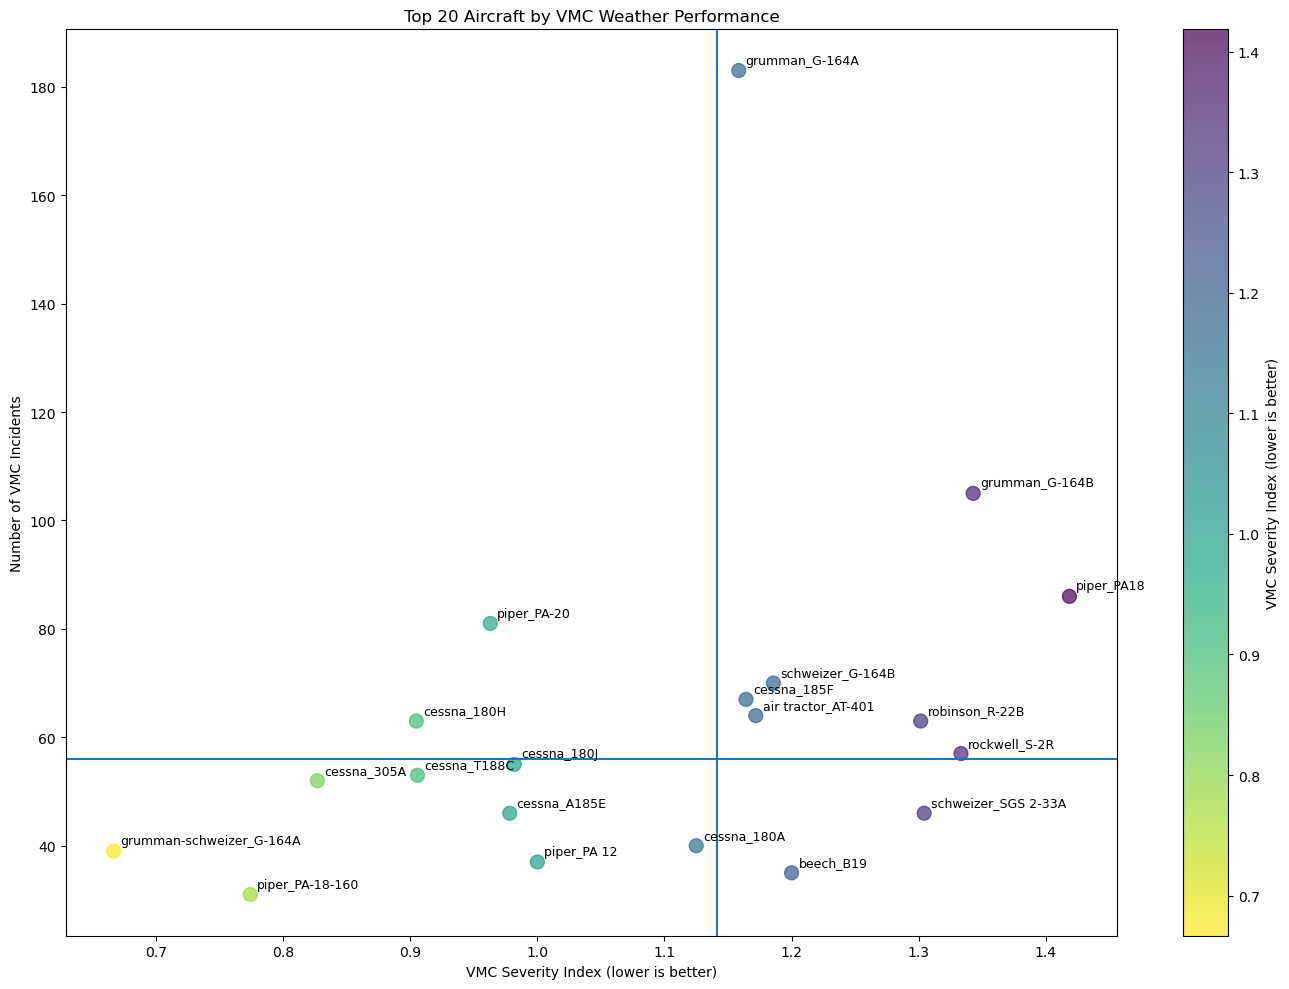

<Figure size 640x480 with 0 Axes>

In [ ]:
aircraft_weather = df.groupby(['Aircraft', 'Weather.Condition']).agg({
    'Event.Id': 'count',
    'Severity.Index': 'mean'
}).reset_index()

aircraft_counts = aircraft_weather.groupby('Aircraft')['Event.Id'].sum()
common_aircraft = aircraft_counts[aircraft_counts >= 30].index.tolist()
aircraft_weather = aircraft_weather[aircraft_weather['Aircraft'].isin(common_aircraft)]

vmc_data = aircraft_weather[aircraft_weather['Weather.Condition'] == 'VMC']
top20_vmc = vmc_data.sort_values('Severity.Index').head(20)

plt.figure(figsize=(14, 10))

scatter = plt.scatter(
    top20_vmc['Severity.Index'], 
    top20_vmc['Event.Id'],
    s=100, 
    c=top20_vmc['Severity.Index'], 
    cmap='viridis_r',
    alpha=0.7
)
#add aircrafts to the plot
for _, row in top20_vmc.iterrows():
    plt.annotate(row['Aircraft'], 
                 (row['Severity.Index'], row['Event.Id']),
                 xytext=(5, 5), 
                 textcoords='offset points',
                 fontsize=9)
plt.colorbar(scatter, label='VMC Severity Index (lower is better)')
plt.title('Top 20 Aircraft by VMC Weather Performance')
plt.xlabel('VMC Severity Index (lower is better)')
plt.ylabel('Number of VMC Incidents')
plt.axvline(top20_vmc['Severity.Index'].median())
plt.axhline(top20_vmc['Event.Id'].median())
plt.savefig('./images/VMC_Weather_vs_Aircraft.png')

plt.tight_layout()
plt.show()

Key findings and recommendations based on VMC weather analysis:

 - Agricultural aircraft such as Grumman-Schweizer G-164A and Air Tractor models consistently show the lowest severity indices in VMC conditions

 - Training aircraft like Piper PA-18-160 and Cessna 305A demonstrate excellent safety profiles with severity indices below 0.8, making them ideal choices for flight schools

 - Utility aircraft including Cessna 180/185 series maintain strong safety records with severity indices under 1.0 despite high usage rates

### 7. Revisiting Objectives with New Findings

Let's revisit our initial objectives and summarize what we've learned from our analysis to provide data-backed recommendations for the Head of Aviation Division.

Our analysis revealed clear patterns in engine safety:

- **3-engine Turbo Jet** configurations demonstrated the lowest severity index, making them the safest choice for large aircraft operations
- **Single-engine Reciprocating** aircraft showed excellent safety records for smaller operations
- **4-engine Turbo Fan** configurations exhibited the highest severity indices and should be avoided when possible
- Aircraft with fewer engines generally had lower severity indices than those with more engines

These insights allow us to recommend specific engine types based on operational needs while avoiding configurations with poor safety records.

Weather resilience analysis produced these key findings:

- Certain aircraft models perform significantly better in IMC (Instrument Meteorological Conditions) than others
- Agricultural aircraft like Grumman-Schweizer and Air Tractor models demonstrated exceptional safety profiles in VMC conditions
- Piper PA series aircraft consistently appeared in the top performers list for both IMC and VMC conditions
- Cessna models (particularly 180/185 series) maintain strong safety records despite high usage rates

This analysis equips our company to select aircraft specifically suited for the weather conditions in our operational regions.

We identified significant variations in risk profiles across different flight purposes:

- **Instructional** and **Aerial Application** operations showed the lowest severity indices
- **Public Aircraft** operations maintained better safety records than many commercial operations
- **Personal** use aircraft had better safety profiles than those used for business purposes
- For business operations, specific models like certain Cessna variants demonstrated lower risk profiles

These findings allow us to align our aircraft selection with our intended operational purpose, further reducing risk.

### 8. Conclusion

Our comprehensive analysis of aviation accident data has provided clear, actionable insights to guide our company's entry into aviation. By analyzing over 80,000 incidents spanning decades, we've identified specific aircraft models, engine configurations, and operational types that demonstrate superior safety profiles.

The data points to several consistent patterns that should inform our aircraft acquisition strategy:

1. **Engine configuration matters significantly** - three-engine turbo jet and single-engine reciprocating configurations demonstrate the lowest risk profiles

2. **Aircraft purpose alignment is crucial** - certain aircraft models perform exceptionally well for specific purposes (training, personal, business) but may have higher risk profiles when used outside their intended purpose

3. **Weather resilience varies dramatically** between aircraft models, with certain designs performing consistently better in challenging conditions

4. **Single-engine aircraft aren't necessarily riskier** than multi-engine aircraft, contrary to common perception

These findings directly address our business problem by providing a data-backed foundation for selecting low-risk aircraft investments. Our analysis reveals that safety isn't simply about choosing the newest or most expensive aircraft, but rather about selecting models with proven safety records that align with our specific operational needs.

As we enter the aviation market, this analysis provides a competitive advantage - allowing us to make informed decisions where competitors might rely on traditional assumptions or incomplete information.